## Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms

import pickle

from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings

from mpl_toolkits.mplot3d import Axes3D

from patsy import dmatrices

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Create dataset with one of the features not informative
n_features = 3
features, target, coef = make_regression(n_samples = 100, n_features = n_features, n_informative = 2, 
                                         n_targets = 1, noise = 25, coef = True)

In [3]:
# Print the shape of the features and the target
print('Feature Shape')
print(features.shape)
print()
print('Target Shape')
print(target.shape)

Feature Shape
(100, 3)

Target Shape
(100,)


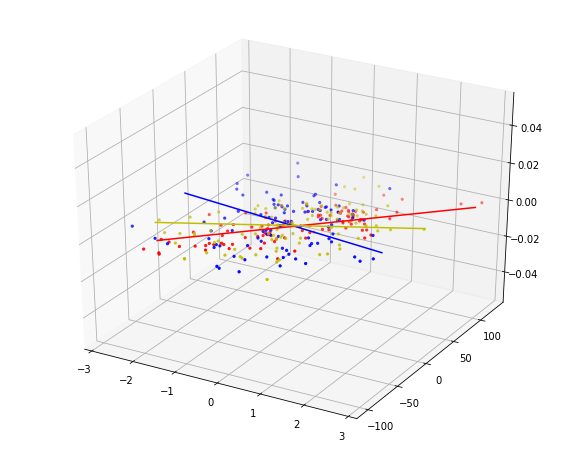

In [4]:
# Plot the data
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features[:,0], target, color='b', marker='.')
ax.scatter(features[:,1], target, color='r', marker='.')
ax.scatter(features[:,2], target, color='y', marker='.')
ax.plot(np.unique(features[:,0]), np.poly1d(np.polyfit(features[:,0], target, 1))(np.unique(features[:,0])), 'b-')
ax.plot(np.unique(features[:,1]), np.poly1d(np.polyfit(features[:,1], target, 1))(np.unique(features[:,1])), 'r-')
ax.plot(np.unique(features[:,2]), np.poly1d(np.polyfit(features[:,2], target, 1))(np.unique(features[:,2])), 'y-')
plt.show()

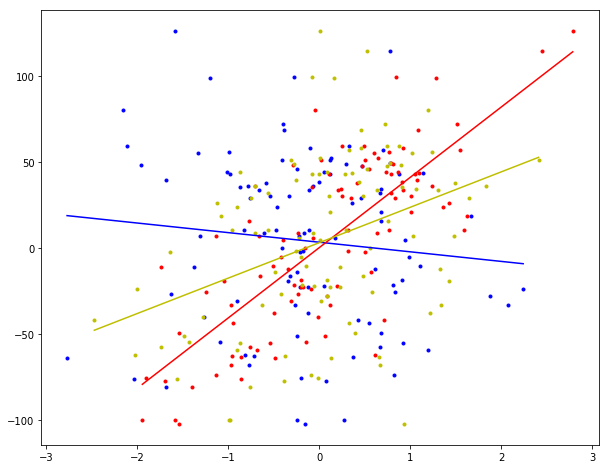

In [5]:
plt.figure(figsize=(10,8))
plt.scatter(features[:,0], target, color='b', marker='.')
plt.scatter(features[:,1], target, color='r', marker='.')
plt.scatter(features[:,2], target, color='y', marker='.')
plt.plot(np.unique(features[:,0]), np.poly1d(np.polyfit(features[:,0], target, 1))(np.unique(features[:,0])), 'b-')
plt.plot(np.unique(features[:,1]), np.poly1d(np.polyfit(features[:,1], target, 1))(np.unique(features[:,1])), 'r-')
plt.plot(np.unique(features[:,2]), np.poly1d(np.polyfit(features[:,2], target, 1))(np.unique(features[:,2])), 'y-')
plt.show()

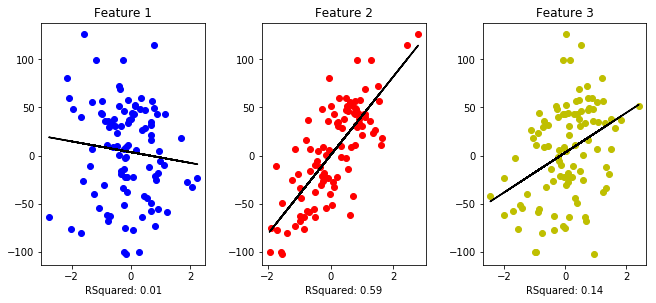

In [6]:
# Plot each feature
plt.figure()

plt.subplot(131)
plt.plot(features[:, 0], target, 'bo')
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(features[:, 0], target)
plt.plot(features[:, 0], intercept1 + slope1*features[:, 0], 'k')
plt.title('Feature 1')
plt.xlabel('RSquared: {0:.2f}'.format(r_value1**2))
# plt.xlabel(f'RSquared: {r_value0**2}')

plt.subplot(132)
plt.plot(features[:, 1], target, 'ro')
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(features[:, 1], target)
plt.plot(features[:, 1], intercept2 + slope2*features[:, 1], 'k')
plt.title('Feature 2')
plt.xlabel('RSquared: {0:.2f}'.format(r_value2**2))

plt.subplot(133)
plt.plot(features[:, 2], target, 'yo')
slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(features[:, 2], target)
plt.plot(features[:, 2], intercept3 + slope3*features[:, 2], 'k')
plt.title('Feature 3')
plt.xlabel('RSquared: {0:.2f}'.format(r_value3**2))

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=1.5, hspace=0.25, wspace=0.35)

plt.show()

In [7]:
# Create a dataframe of the features and add the target
df = pd.DataFrame(features)
df.columns = ['Feature_1', 'Feature_2', 'Feature_3']
df['Target'] = target
print('Dataframe Head')
print(df.head())

Dataframe Head
   Feature_1  Feature_2  Feature_3     Target
0  -1.677734   1.080323  -0.253888  39.909065
1  -0.385251   1.089929   0.458153  68.607243
2   0.684922  -1.535556   0.394082 -49.480696
3   0.685138   0.244855   1.068003  34.486267
4  -0.867787  -0.077602   0.908180  35.447078


In [8]:
# Summary statistics
print(df.describe())

        Feature_1   Feature_2   Feature_3      Target
count  100.000000  100.000000  100.000000  100.000000
mean    -0.142998    0.099096    0.055151    4.328260
std      0.937223    0.940779    0.912748   50.066741
min     -2.767342   -1.940619   -2.468275 -101.990585
25%     -0.723579   -0.509876   -0.500855  -31.137645
50%     -0.170836    0.112079    0.090289    9.014072
75%      0.564946    0.785177    0.661259   43.126535
max      2.241734    2.786205    2.411160  126.311803


In [9]:
# Ordinary Least Squares Model
model = sm.OLS(endog = target, exog = features[:, [0, 1, 2]]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     119.8
Date:                Mon, 17 Sep 2018   Prob (F-statistic):           1.72e-32
Time:                        21:14:13   Log-Likelihood:                -455.68
No. Observations:                 100   AIC:                             917.4
Df Residuals:                      97   BIC:                             925.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.4177      2.494     -0.969      0.335      -7.367       2.532
x2            42.5538      2.496     17.046      0.000      37.599      47.508
x3            23.8357      2.591      9.200      0.000      18.694      28.978
==============================================================================
Omnibus:                        1.107   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.575   Jarque-Bera (JB):                0.703
Skew:                           0.186   Prob(JB):                        0.704
Kurtosis:                       3.174   Cond. No.                         1.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Backward elimination by removing highest P if P > .05
# model = sm.OLS(endog = target, exog = features[:, [0, 1]]).fit()
# model.summary()

In [11]:
# 99% confidence interval

print(model.conf_int(0.01))

[[ -8.97026187   4.13491975]
 [ 35.99468601  49.11295543]
 [ 17.02837594  30.64297636]]


In [12]:
# Deconstruct df to y and X
y, X = dmatrices('Target ~ Feature_1 + Feature_2 + Feature_3', data=df, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,1.0,Intercept
1,1.0,Feature_1
2,1.0,Feature_2
3,1.0,Feature_3


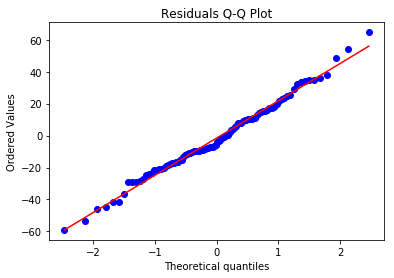

In [13]:
# Probability Plot
stats.probplot(model.resid, dist="norm", plot= plt)
plt.title("Residuals Q-Q Plot")
plt.show()

In [14]:
# https://pythonfordatascience.org/linear-regression-python/
# Assumption of multicollinearity
print(df.corr())

           Feature_1  Feature_2  Feature_3    Target
Feature_1   1.000000  -0.024385  -0.080634 -0.104562
Feature_2  -0.024385   1.000000  -0.080228  0.769141
Feature_3  -0.080634  -0.080228   1.000000  0.375926
Target     -0.104562   0.769141   0.375926  1.000000


In [15]:
# Assumption of independent errors
print(statsmodels.stats.stattools.durbin_watson(model.resid))

2.00404545106


In [16]:
# Assumption of normality of the residuals
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(model.resid)
print(lzip(name, test))

[('Jarque-Bera', 0.7029431770820408), ('Chi^2 two-tail prob.', 0.70365184145343207), ('Skew', 0.18595035908107635), ('Kurtosis', 3.1743451127223383)]


In [17]:
# Assumption of homoscedasticity
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
print(lzip(name, test))

[('Lagrange multiplier statistic', 6.512336897411874), ('p-value', 0.038535767279805642), ('f-value', 2.2523352568126662), ('f p-value', 0.087119210859389451)]


Cost Function
265.781403973

Weights via Make Regression Function
   True Coefficient Values
0                 0.000000
1                39.917347
2                21.197741

Weights via Linear Algebra
[[ -2.41767106]
 [ 42.55382072]
 [ 23.83567615]]

Weights via J History
[[ -2.42437591]
 [ 42.54491565]
 [ 23.82381187]]



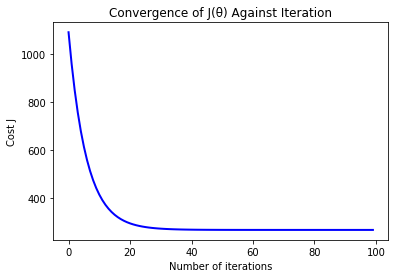

In [18]:
def cost_function(features, target, weights):

    return ((features.dot(weights) - np.vstack(target.T)) ** 2).sum()/(2 * target.size)

def gradientDescent(features, target, weights, alpha, num_iters):

    # Initialize values
    J_history = np.zeros((num_iters, 1))

    for i in range(num_iters):       
        # beta = beta - alpha * (X.T.dot(X.dot(beta)-y)/m)
        weights = weights - alpha*(1.0/m) * features.T.dot(features.dot(weights) - np.vstack(target.T))

        # cost history    
        J_history[i] = cost_function(features, target, weights)

    return weights, J_history

# Choose a learning rate
alpha = 0.1
num_iters = 100

# Andres Ng's M&Ns
m, n = features.shape # observations, features

# Init weights and run gradient descent 
weights = np.zeros((features.shape[1], 1)) 
weights, J_history = gradientDescent(features, target, weights, alpha, num_iters)

print('Cost Function')
print(cost_function(features, target, (np.linalg.inv(features.T.dot(features)).dot(features.T).dot(target)).reshape(n, 1)))

print()
print('Weights via Make Regression Function')
print(pd.DataFrame(coef, columns=['True Coefficient Values']))
print()
print('Weights via Linear Algebra')
print((np.linalg.inv(features.T.dot(features)).dot(features.T).dot(target)).reshape(n, 1))
print()
print('Weights via J History')
print(weights)
print()

# Plot convergence
plt.plot(range(J_history.size), J_history, "-b", linewidth=2 )
plt.title('Convergence of J(\u03B8) Against Iteration')
# r'J($\theta$)'
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show(block=False)

In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Pickle regressor for flask api
# with open('./multiple_regression.pkl', 'wb') as model_pkl:
#     pickle.dump(regressor, model_pkl, protocol=2)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Calculate the weights from the normal equation
ne_weights = np.linalg.pinv(np.transpose(features).dot(features)).dot(np.transpose(features).dot(target))

# Display normal equation's result
print('Weights computed from gradient descent:')
print('{:f}, {:f}, {:f}'.format(weights[0,0], weights[1,0], weights[2,0]))
print('Weights computed from closed-form solution (normal equation):')
print('{:f}, {:f}, {:f}'.format(ne_weights[0], ne_weights[1], ne_weights[2]))
print('Metrics')
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('R Squared: ', r2_score(y_test, y_pred))
print('Score: ', regressor.score(X_test, y_test))

Weights computed from gradient descent:
-2.424376, 42.544916, 23.823812
Weights computed from closed-form solution (normal equation):
-2.417671, 42.553821, 23.835676
Metrics
Mean Squared Error:  512.532419075
Mean Absolute Error:  18.6230026588
R Squared:  0.722585177711
Score:  0.722585177711
